- Start Date: 2018-08-31
- End Date: 2024-08-31
- Area: Colorado

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

In [31]:
df = pd.read_pickle('Datasets/real_estate_co.pkl')
df

,RegionName,StateName,observed_rent_index,home_value_index,median_sale_price,median_list_price
19,Denver,CO,"[1559.232583100959, 1564.717568726074, 1569.22...","[405575.9924841779, 406922.8904254876, 407910....","[412759.0, 411471.0, 411636.0, 410467.0, 41170...","[453300.0, 450000.0, 448333.0, 445833.0, 44550..."
78,Colorado Springs,CO,"[1335.4430557607943, 1340.570161360893, 1341.5...","[302831.03362379904, 304860.16758029134, 30631...","[286617.0, 287688.0, 289116.0, 289883.0, 28959...","[335000.0, 331667.0, 330000.0, 330000.0, 33166..."
148,Fort Collins,CO,"[1442.3116670040386, 1446.6637350605274, 1454....","[392014.6606747012, 393332.8100245893, 394216....","[385320.0, 384338.0, 382852.0, 380739.0, 38088...","[424967.0, 424467.0, 424467.0, 422800.0, 42096..."
152,Boulder,CO,"[1757.3600722214474, 1759.5802858785166, 1767....","[523262.463351821, 524841.5972632162, 526519.1...","[546498.0, 550460.0, 563523.0, 563182.0, 56340...","[617650.0, 608317.0, 600000.0, 599967.0, 60996..."
157,Greeley,CO,"[1368.1778735474606, 1387.1230235959138, 1394....","[352771.1129270129, 354311.6651858562, 355712....","[325738.0, 326167.0, 329923.0, 335054.0, 33863...","[354065.0, 359065.0, 361483.0, 362500.0, 36250..."
253,Pueblo,CO,"[836.3498670228539, 843.8516447962819, 845.586...","[177095.9273324609, 178663.1524001904, 179774....","[172840.0, 169994.0, 167019.0, 165915.0, 15973...","[234500.0, 234483.0, 232483.0, 232900.0, 23121..."
268,Grand Junction,CO,"[1009.1179296343132, 1009.0196476132064, 1016....","[247764.8285489817, 249786.5646608963, 251421....","[229680.0, 229031.0, 230660.0, 232317.0, 23743...","[279100.0, 279167.0, 283367.0, 292233.0, 29730..."
423,Glenwood Springs,CO,"[2344.5397368650483, 2353.272430546569, 2327.5...","[526669.6679267199, 528997.8565583624, 530969....","[410451.0, 401031.0, 430105.0, 438737.0, 44157...","[773667.0, 811333.0, 823000.0, 821000.0, 85050..."
492,Edwards,CO,"[800.8970950302808, 801.8689031880194, 801.759...","[690418.1446963669, 695250.6717727525, 699491....","[710294.0, 732906.0, 720761.0, 713950.0, 68978...","[1157317.0, 1172317.0, 1188983.0, 1213000.0, 1..."
493,Durango,CO,"[781.3709370595712, 782.1325718965629, 781.856...","[411771.92700623145, 412668.2535083229, 413080...","[396533.0, 410350.0, 412132.0, 420261.0, 42684...","[519800.0, 511800.0, 511633.0, 519983.0, 52331..."


In [32]:
#Function to create a date range for the time series data (mapping)
def create_date_range(start='2018-08-31', end='2024-08-31', freq='M'):
    """Create a date range for the time series data"""
    return pd.date_range(start=start, end=end, freq=freq)

date_range = create_date_range()
date_range

/var/folders/y_/b1tvl6l53p3_kgr4vjlhss9w0000gn/T/ipykernel_1780/813405786.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return pd.date_range(start=start, end=end, freq=freq)


DatetimeIndex(['2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31',
               '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
               '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
               '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30',
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
               '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31',
      

In [36]:
#Function to plot the region metrics 
def plot_region_metrics(df, region_name, date_range):
    """
    Plot all metrics for a specific region over time
    """
    plt.figure(figsize=(15, 8))
    
    # Get the data for the specific region
    region_data = df[df['RegionName'] == region_name]
    
    # Plot each metric
    metrics = ['home_value_index', 'median_sale_price', 'median_list_price']
    for metric in metrics:
        plt.plot(date_range, region_data[metric].iloc[0], 
                label=metric.replace('_', ' ').title(),
                marker='o', markersize=4)
    
    plt.title(f'Real Estate Metrics Over Time - {region_name}')
    plt.xlabel('Date')
    plt.ylabel('Value ($)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    return plt

#Function to plot the region metrics comparison
def plot_metric_comparison(df, metric, top_n=5, date_range=None):
    """
    Plot comparison of a specific metric across top N regions
    """
    plt.figure(figsize=(15, 8))
    
    # Calculate the mean value for each region to find top N
    region_means = []
    for _, row in df.iterrows():
        mean_value = np.mean(row[metric])
        region_means.append((row['RegionName'], mean_value))
    
    # Sort and get top N regions
    top_regions = sorted(region_means, key=lambda x: x[1], reverse=True)[:top_n]
    
    # Plot each region
    for region, _ in top_regions:
        region_data = df[df['RegionName'] == region][metric].iloc[0]
        plt.plot(date_range, region_data, label=region, marker='o', markersize=4)
    
    plt.title(f'Comparison of {metric.replace("_", " ").title()} Across Top {top_n} Regions')
    plt.xlabel('Date')
    plt.ylabel('Value ($)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    return plt

def calculate_growth_rates(df, metric, date_range):
    """
    Calculate and visualize growth rates for each region
    """
    growth_rates = []
    
    for _, row in df.iterrows():
        initial_value = row[metric][0]
        final_value = row[metric][-1]
        growth_rate = ((final_value - initial_value) / initial_value) * 100
        growth_rates.append((row['RegionName'], growth_rate))
    
    # Sort by growth rate
    growth_rates.sort(key=lambda x: x[1], reverse=True)
    
    # Create bar plot
    plt.figure(figsize=(15, 8))
    regions, rates = zip(*growth_rates)
    plt.bar(regions, rates)
    plt.title(f'Total Growth Rate in {metric.replace("_", " ").title()} by Region')
    plt.xlabel('Region')
    plt.ylabel('Growth Rate (%)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y')
    plt.tight_layout()
    return plt

def create_heatmap(df, metric, date_range):
    """
    Create a heatmap showing the metric values across regions and time
    """
    # Prepare data for heatmap
    heatmap_data = []
    for _, row in df.iterrows():
        heatmap_data.append(row[metric])
    
    heatmap_df = pd.DataFrame(heatmap_data, 
                             index=df['RegionName'],
                             columns=date_range)
    
    # Create heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(heatmap_df, cmap='YlOrRd', 
                xticklabels=12,  # Show every 12th month
                yticklabels=True)
    plt.title(f'{metric.replace("_", " ").title()} Heatmap')
    plt.xlabel('Date')
    plt.ylabel('Region')
    plt.tight_layout()
    return plt

#### Region Metrics

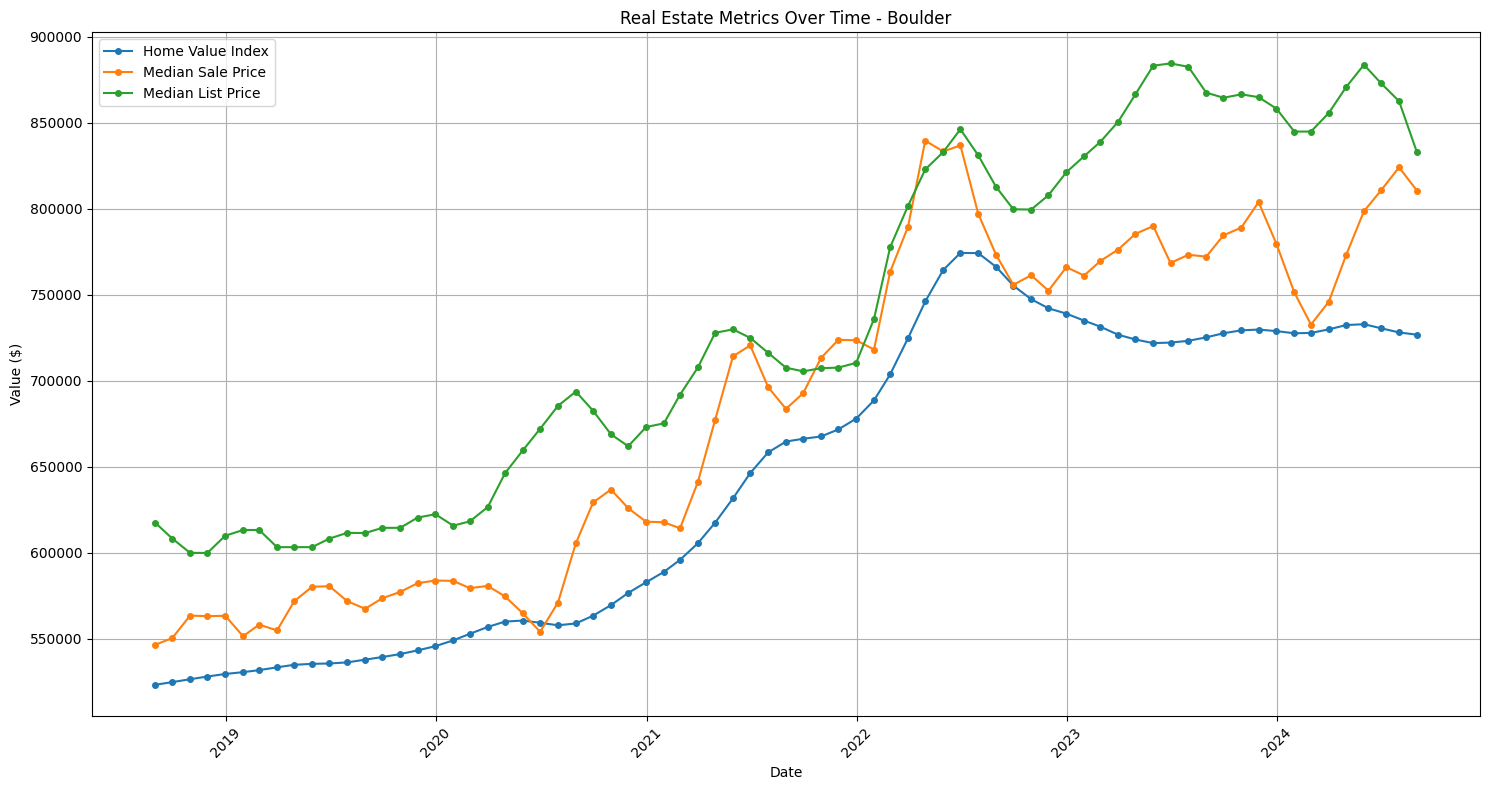

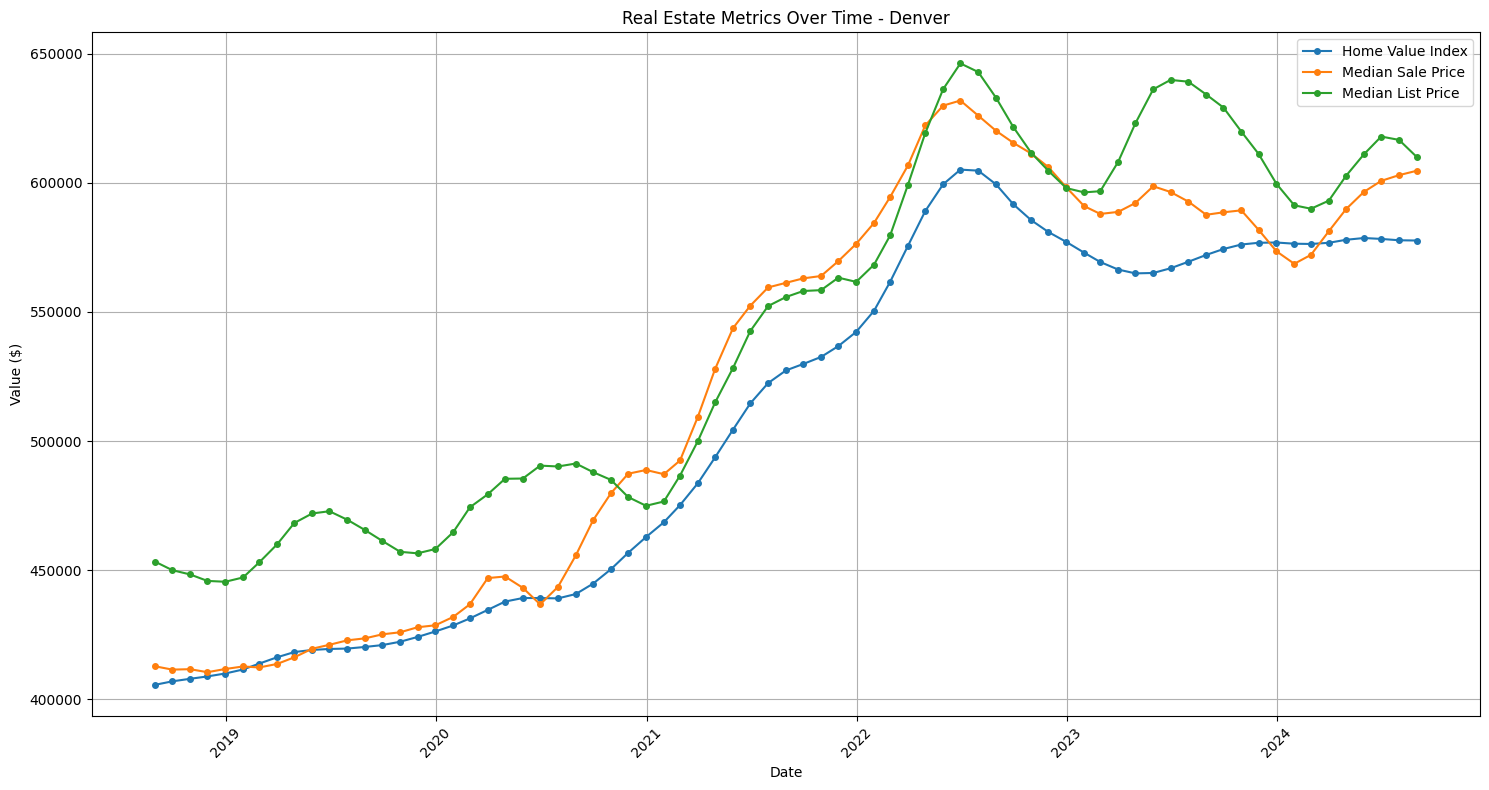

In [37]:
#Plotting the region metrics

plot_region_metrics(df, 'Boulder', date_range)
plt.show()

plot_region_metrics(df, 'Denver', date_range)
plt.show()


#### Metrics comparison

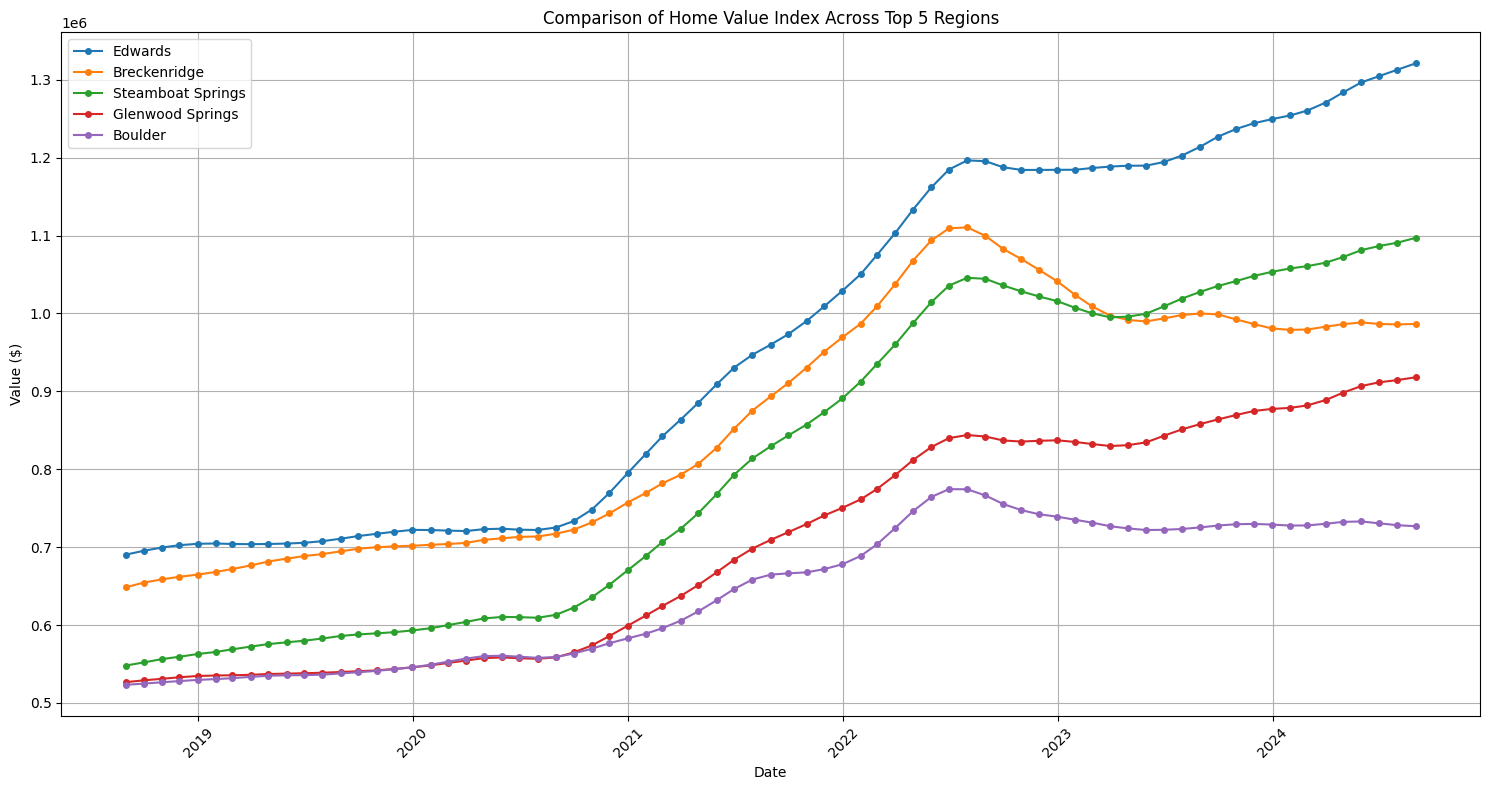

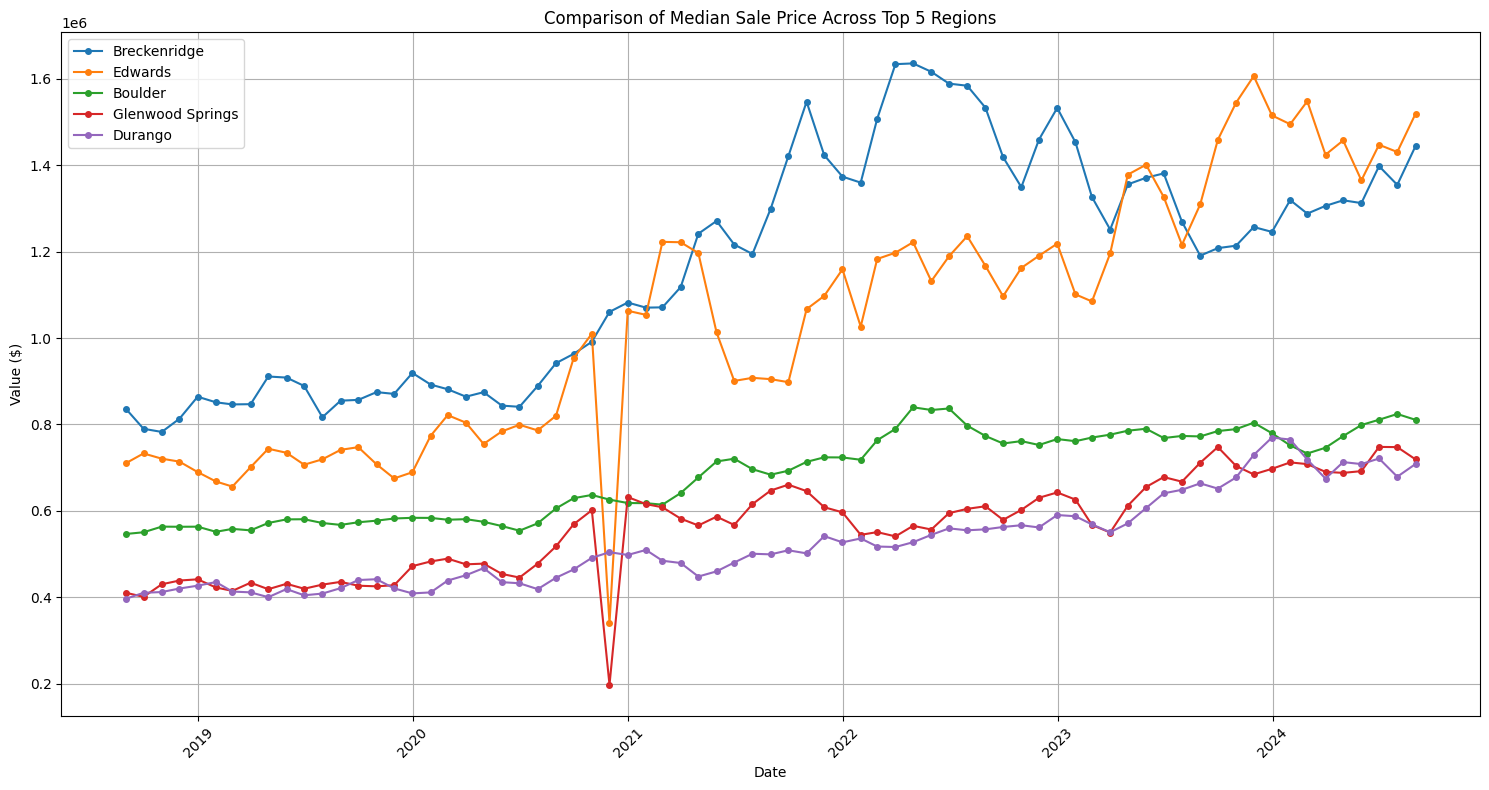

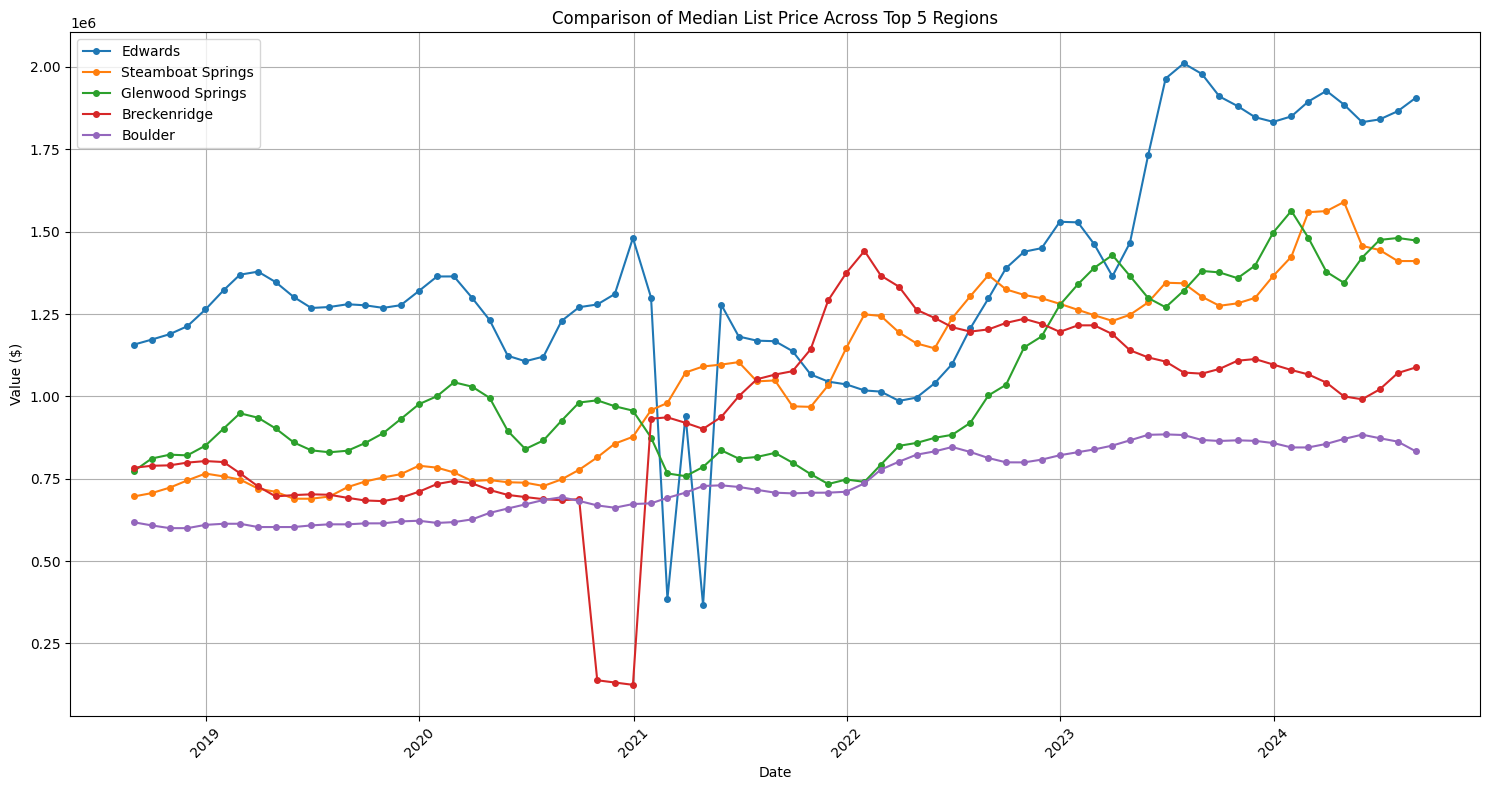

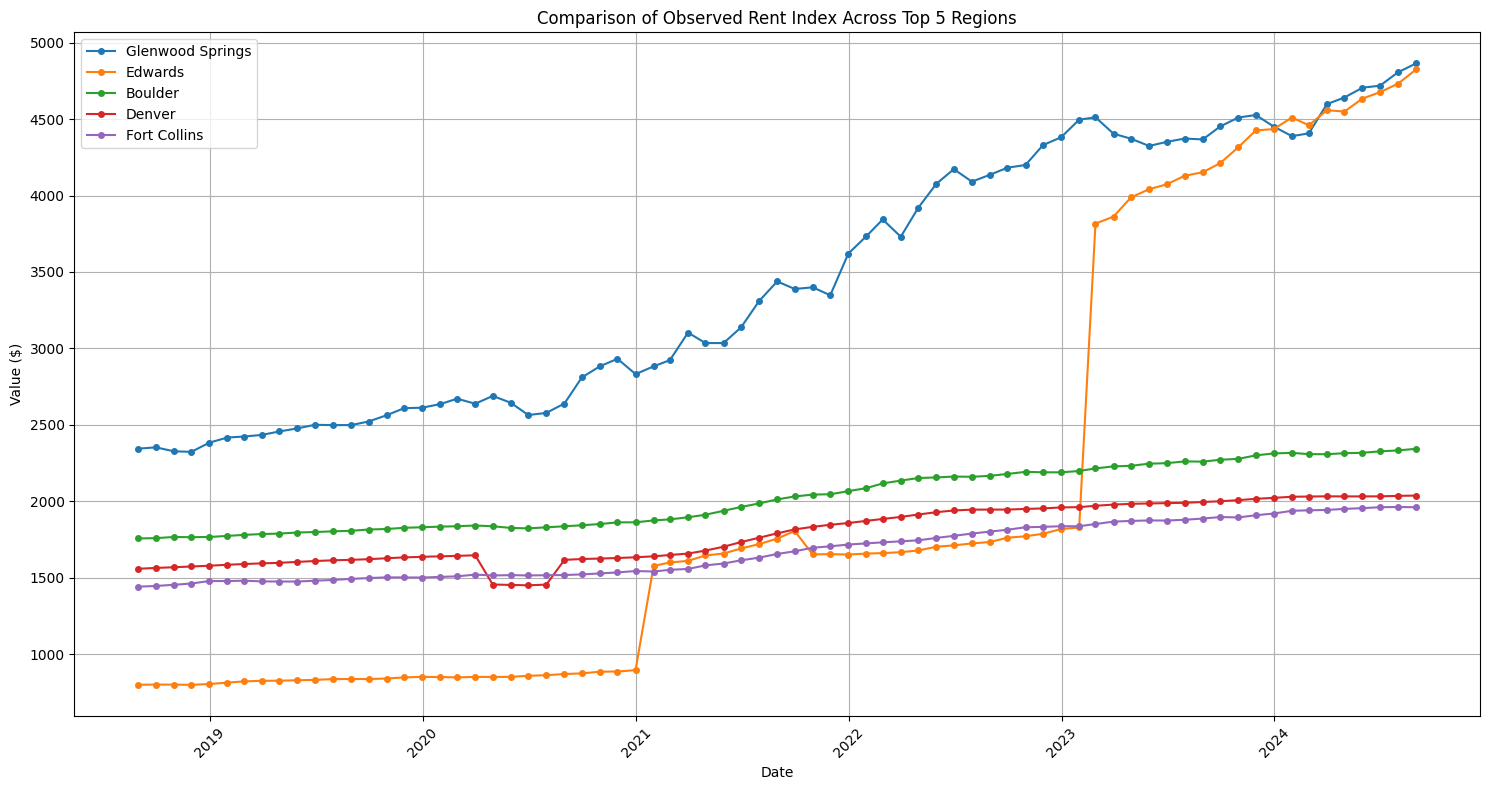

In [39]:
plot_metric_comparison(df, 'home_value_index', date_range=date_range)
plt.show()

plot_metric_comparison(df, 'median_sale_price', date_range=date_range)
plt.show()

plot_metric_comparison(df, 'median_list_price', date_range=date_range)
plt.show()

plot_metric_comparison(df, 'observed_rent_index', date_range=date_range)
plt.show()

In [ ]:
# 3. Visualize growth rates
calculate_growth_rates(df, 'median_sale_price', date_range)
plt.show()

/var/folders/y_/b1tvl6l53p3_kgr4vjlhss9w0000gn/T/ipykernel_1780/3917889305.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return pd.date_range(start=start, end=end, freq=freq)


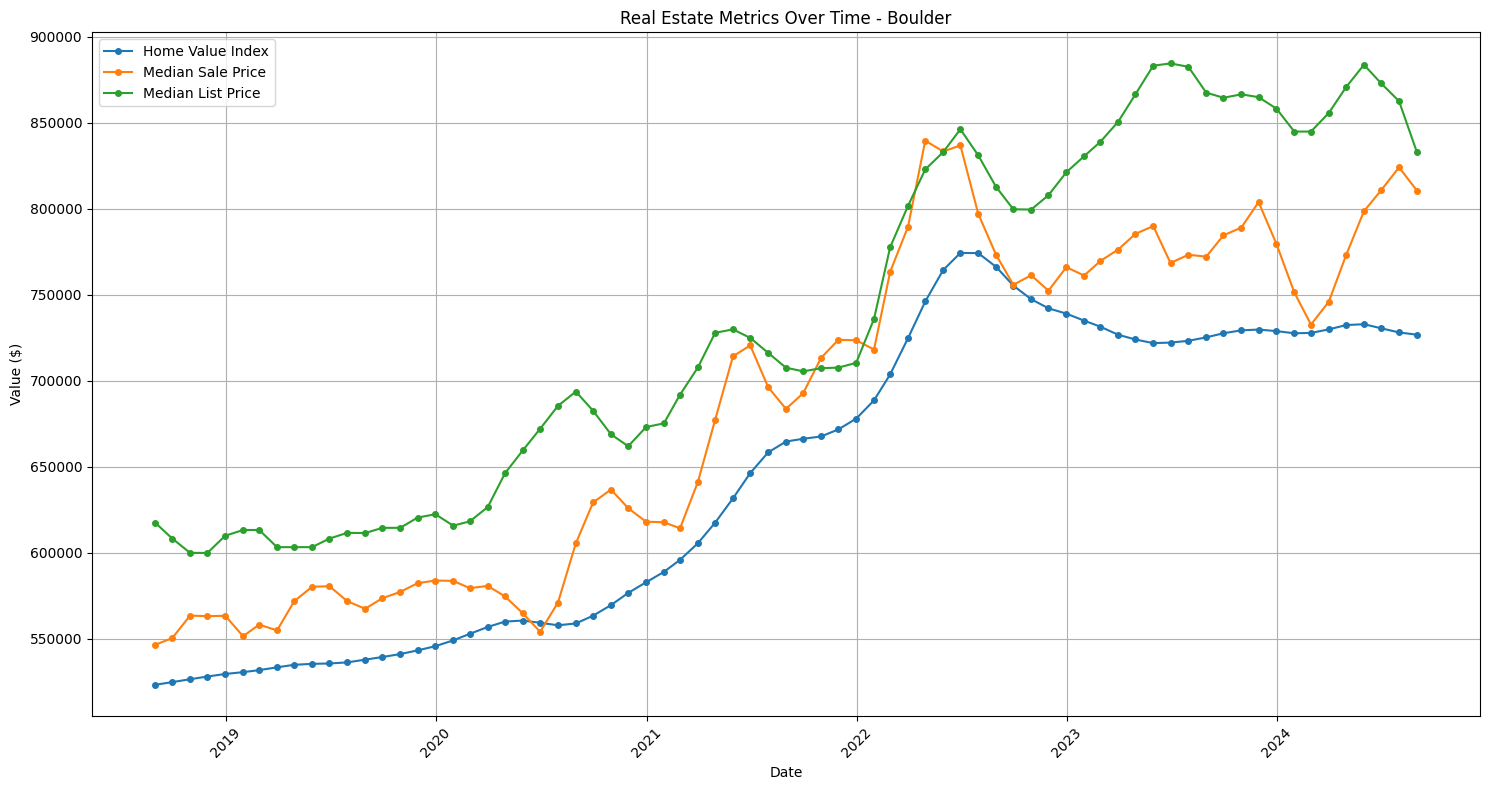

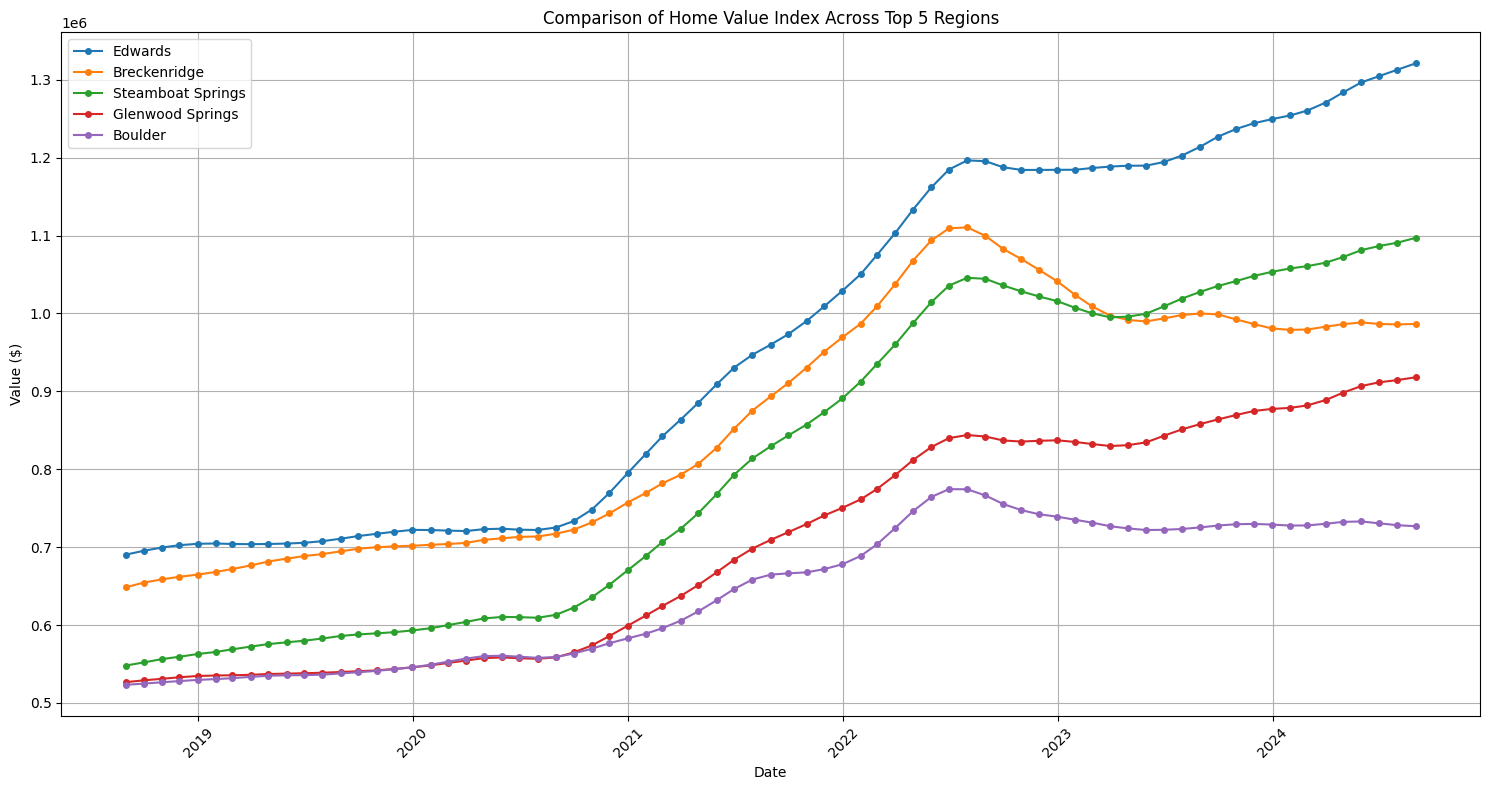

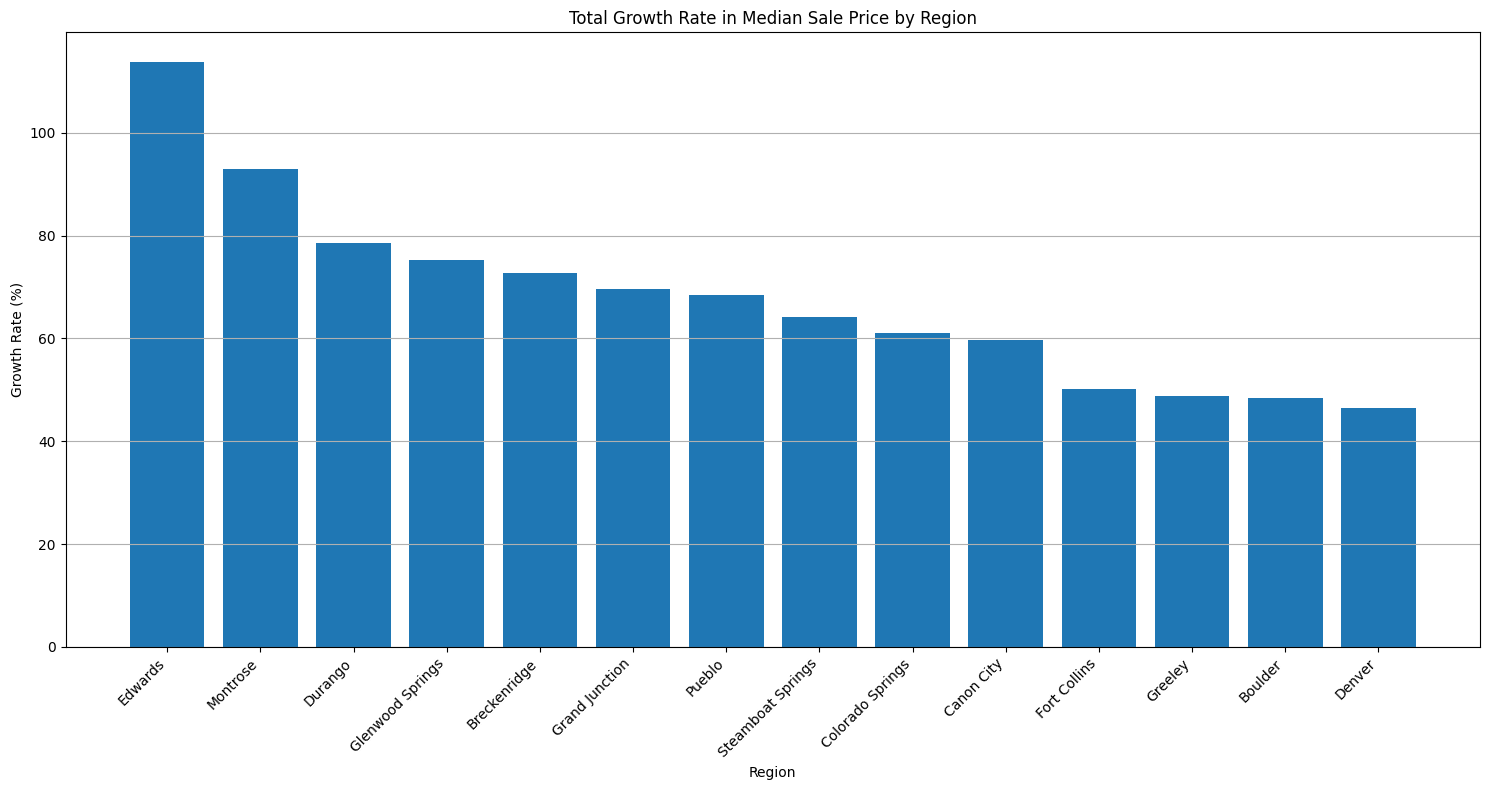

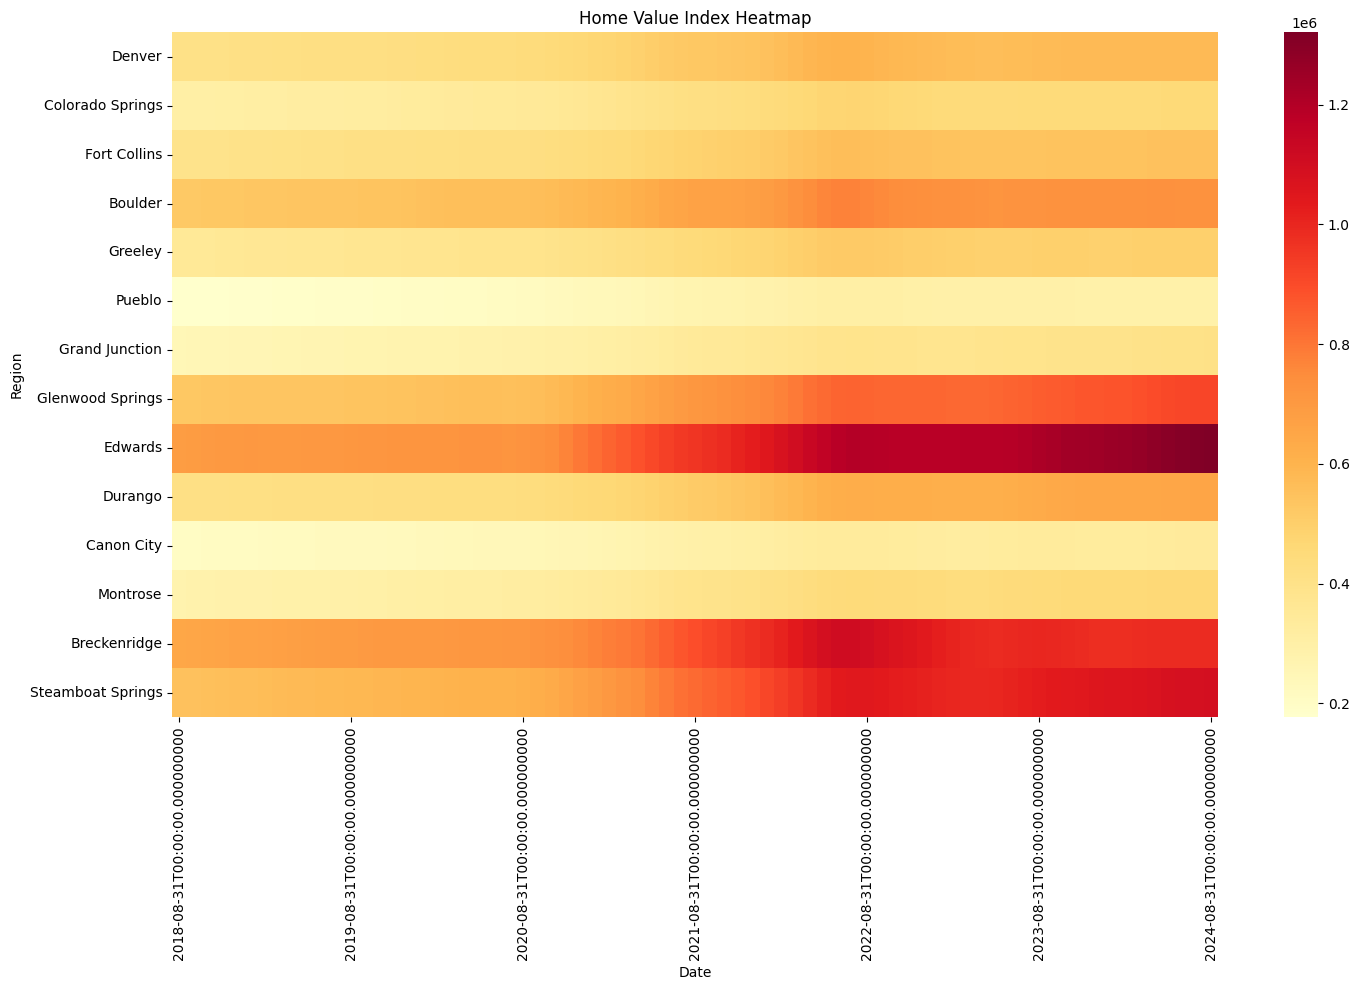

In [12]:


# 4. Create a heatmap
create_heatmap(df, 'home_value_index', date_range)
plt.show()

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose


def analyze_price_volatility(df, metric, date_range):
    """
    Analyze and visualize price volatility across regions
    """
    # Create figure and axis objects explicitly
    fig, ax = plt.subplots(figsize=(15, 8))
    
    volatilities = []
    for _, row in df.iterrows():
        # Calculate month-over-month percentage changes
        values = row[metric]
        pct_changes = np.diff(values) / values[:-1] * 100
        volatility = np.std(pct_changes)
        volatilities.append((row['RegionName'], volatility))
    
    # Sort by volatility
    volatilities.sort(key=lambda x: x[1], reverse=True)
    regions, vol_values = zip(*volatilities)
    
    # Create color normalization
    norm = plt.Normalize(vmin=min(vol_values), vmax=max(vol_values))
    
    # Create bar plot with color gradient
    bars = ax.bar(regions, vol_values)
    
    # Color gradient based on volatility
    sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=norm)
    sm.set_array([])  # You need this line for the colorbar to work properly
    
    # Color each bar according to its value
    for bar, vol in zip(bars, vol_values):
        bar.set_facecolor(sm.to_rgba(vol))
    
    # Add colorbar to the axis
    fig.colorbar(sm, ax=ax, label='Volatility Level')
    
    # Customize the plot
    ax.set_title(f'Price Volatility by Region - {metric.replace("_", " ").title()}')
    ax.set_xlabel('Region')
    ax.set_ylabel('Volatility (Std Dev of Monthly % Changes)')
    
    # Rotate x-axis labels properly
    ax.set_xticks(range(len(regions)))
    ax.set_xticklabels(regions, rotation=45, ha='right')
    
    ax.grid(True, axis='y')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return plt


# The rest of the functions remain the same as in the previous artifact

def analyze_seasonality(df, region_name, metric, date_range):
    """
    Analyze and visualize seasonality patterns for a specific region
    """
    region_data = df[df['RegionName'] == region_name][metric].iloc[0]
    
    # Create time series
    ts = pd.Series(region_data, index=date_range)
    
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(ts, period=12, extrapolate_trend='freq')
    
    # Plot decomposition
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
    
    decomposition.observed.plot(ax=ax1)
    ax1.set_title('Observed')
    ax1.grid(True)
    
    decomposition.trend.plot(ax=ax2)
    ax2.set_title('Trend')
    ax2.grid(True)
    
    decomposition.seasonal.plot(ax=ax3)
    ax3.set_title('Seasonal')
    ax3.grid(True)
    
    decomposition.resid.plot(ax=ax4)
    ax4.set_title('Residual')
    ax4.grid(True)
    
    plt.tight_layout()
    return plt

def price_correlation_analysis(df, date_range):
    """
    Analyze correlations between different price metrics
    """
    correlations = []
    metrics = ['home_value_index', 'median_sale_price', 'median_list_price']
    
    for _, row in df.iterrows():
        region_corr = {}
        region_corr['RegionName'] = row['RegionName']
        
        for i in range(len(metrics)):
            for j in range(i+1, len(metrics)):
                corr = stats.pearsonr(row[metrics[i]], row[metrics[j]])[0]
                region_corr[f'{metrics[i]}_{metrics[j]}'] = corr
        
        correlations.append(region_corr)
    
    corr_df = pd.DataFrame(correlations)
    
    # Create correlation heatmap
    plt.figure(figsize=(12, 8))
    correlation_matrix = corr_df.drop('RegionName', axis=1).mean().to_frame().T
    
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='RdYlBu', 
                center=0,
                vmin=-1, 
                vmax=1)
    
    plt.title('Average Correlation Between Price Metrics Across All Regions')
    plt.tight_layout()
    return plt, corr_df

def price_distribution_analysis(df, metric, date_range):
    """
    Analyze the distribution of prices across regions over time
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Get latest values for all regions
    latest_values = [row[metric][-1] for _, row in df.iterrows()]
    regions = df['RegionName'].tolist()
    
    # Box plot of price distributions
    all_values = []
    for _, row in df.iterrows():
        all_values.extend(row[metric])
    
    sns.boxplot(data=all_values, ax=ax1)
    ax1.set_title(f'Distribution of {metric.replace("_", " ").title()} Across All Regions and Time')
    ax1.set_ylabel('Price ($)')
    
    # Violin plot for latest prices
    sns.violinplot(data=latest_values, ax=ax2)
    ax2.set_title(f'Distribution of Current {metric.replace("_", " ").title()} Across Regions')
    ax2.set_ylabel('Price ($)')
    
    plt.tight_layout()
    return plt

def calculate_summary_statistics(df, metric):
    """
    Calculate comprehensive summary statistics for each region
    """
    stats_data = []
    
    for _, row in df.iterrows():
        values = row[metric]
        region_stats = {
            'RegionName': row['RegionName'],
            'Mean': np.mean(values),
            'Median': np.median(values),
            'Std Dev': np.std(values),
            'Min': np.min(values),
            'Max': np.max(values),
            'Total Growth %': ((values[-1] - values[0]) / values[0]) * 100,
            'Annualized Growth %': (((values[-1] / values[0]) ** (1 / (len(values)/12))) - 1) * 100
        }
        stats_data.append(region_stats)
    
    return pd.DataFrame(stats_data).sort_values('Mean', ascending=False)

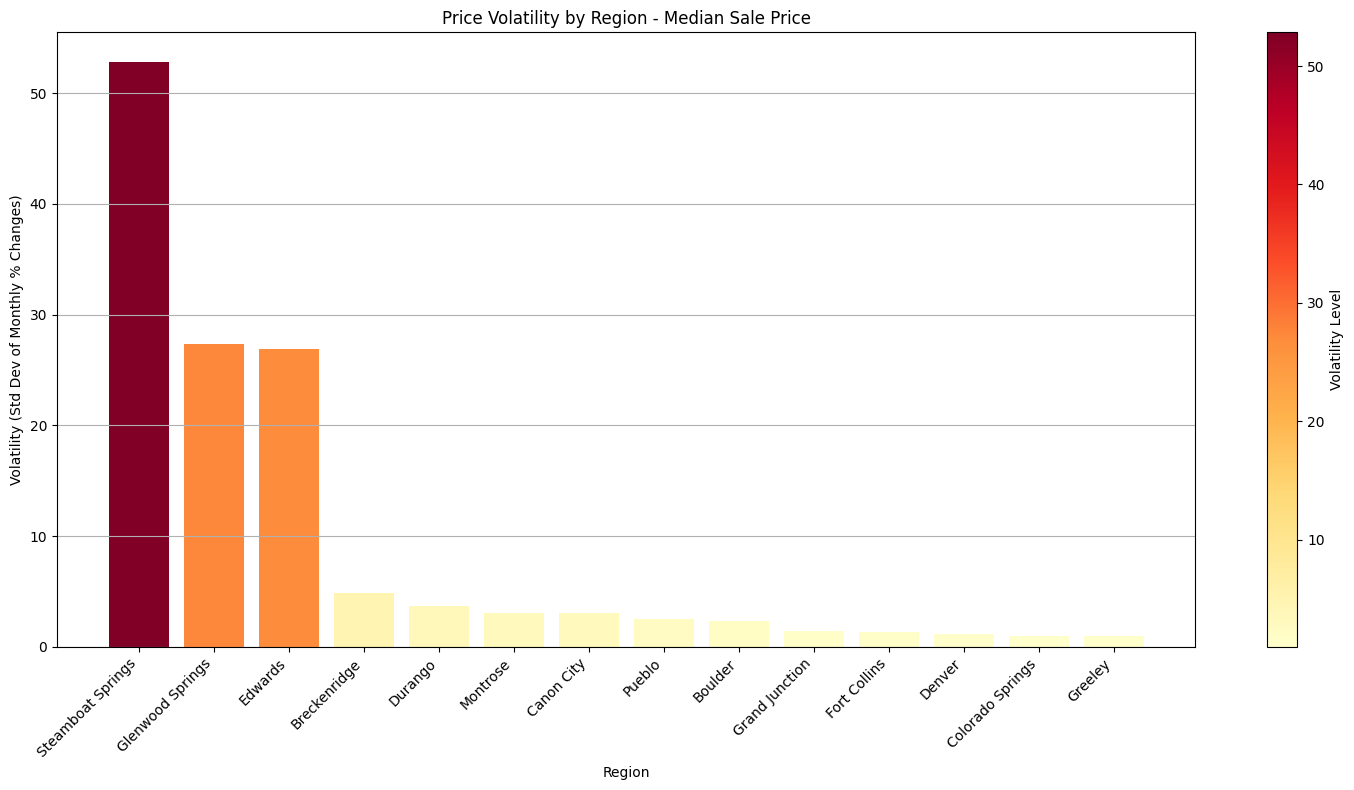

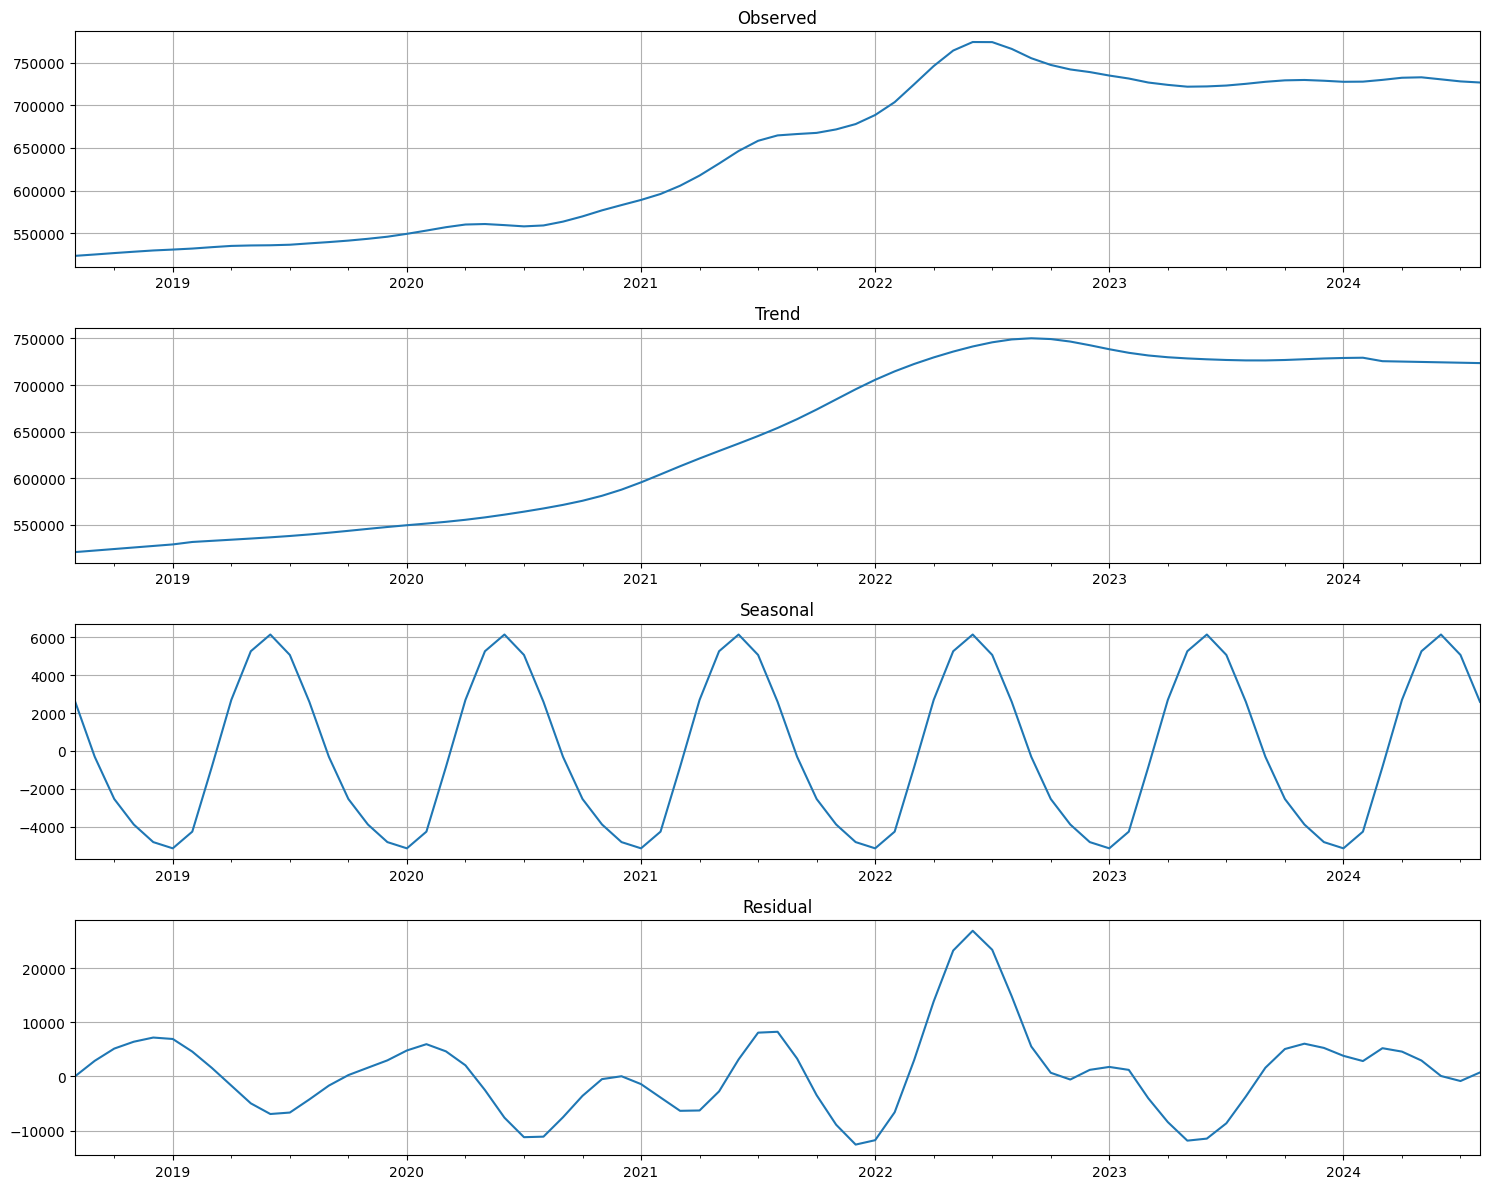

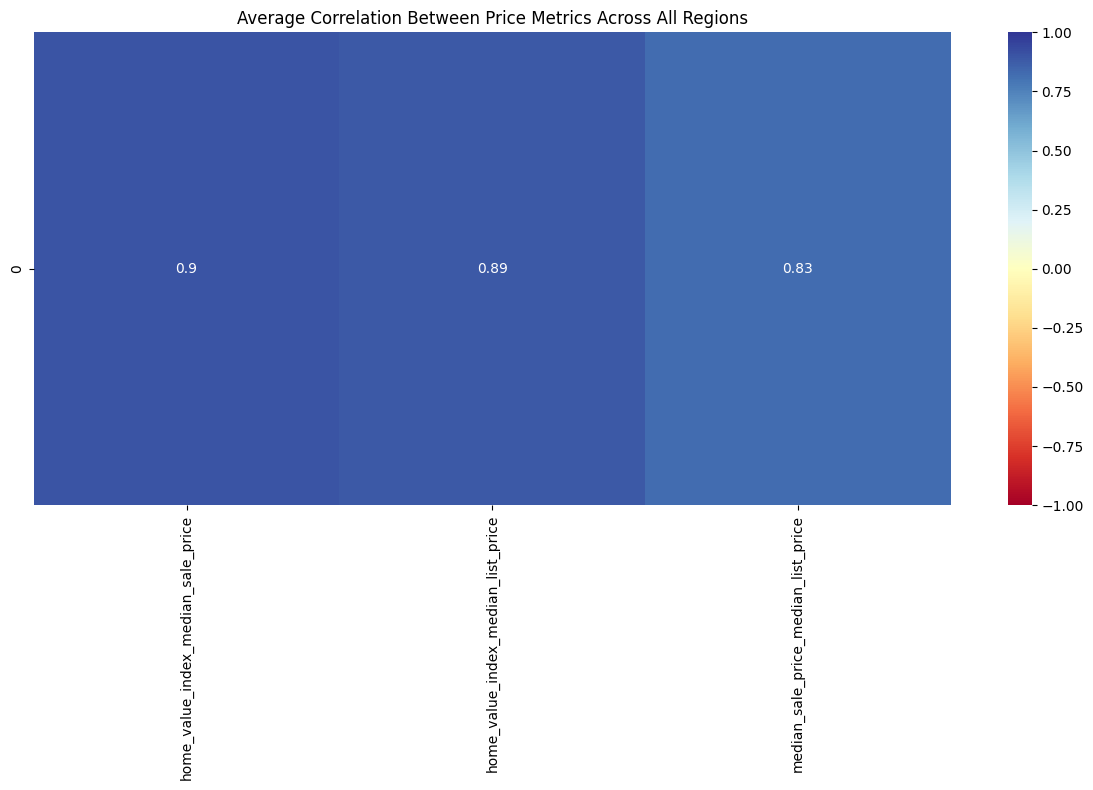

           RegionName  home_value_index_median_sale_price  \
0              Denver                            0.989761   
1    Colorado Springs                            0.992662   
2        Fort Collins                            0.987740   
3             Boulder                            0.975299   
4             Greeley                            0.991822   
5              Pueblo                            0.973576   
6      Grand Junction                            0.993357   
7    Glenwood Springs                            0.834628   
8             Edwards                            0.897637   
9             Durango                            0.914549   
10         Canon City                            0.972406   
11           Montrose                            0.979849   
12       Breckenridge                            0.943861   
13  Steamboat Springs                            0.158136   

    home_value_index_median_list_price  median_sale_price_median_list_price  
0     

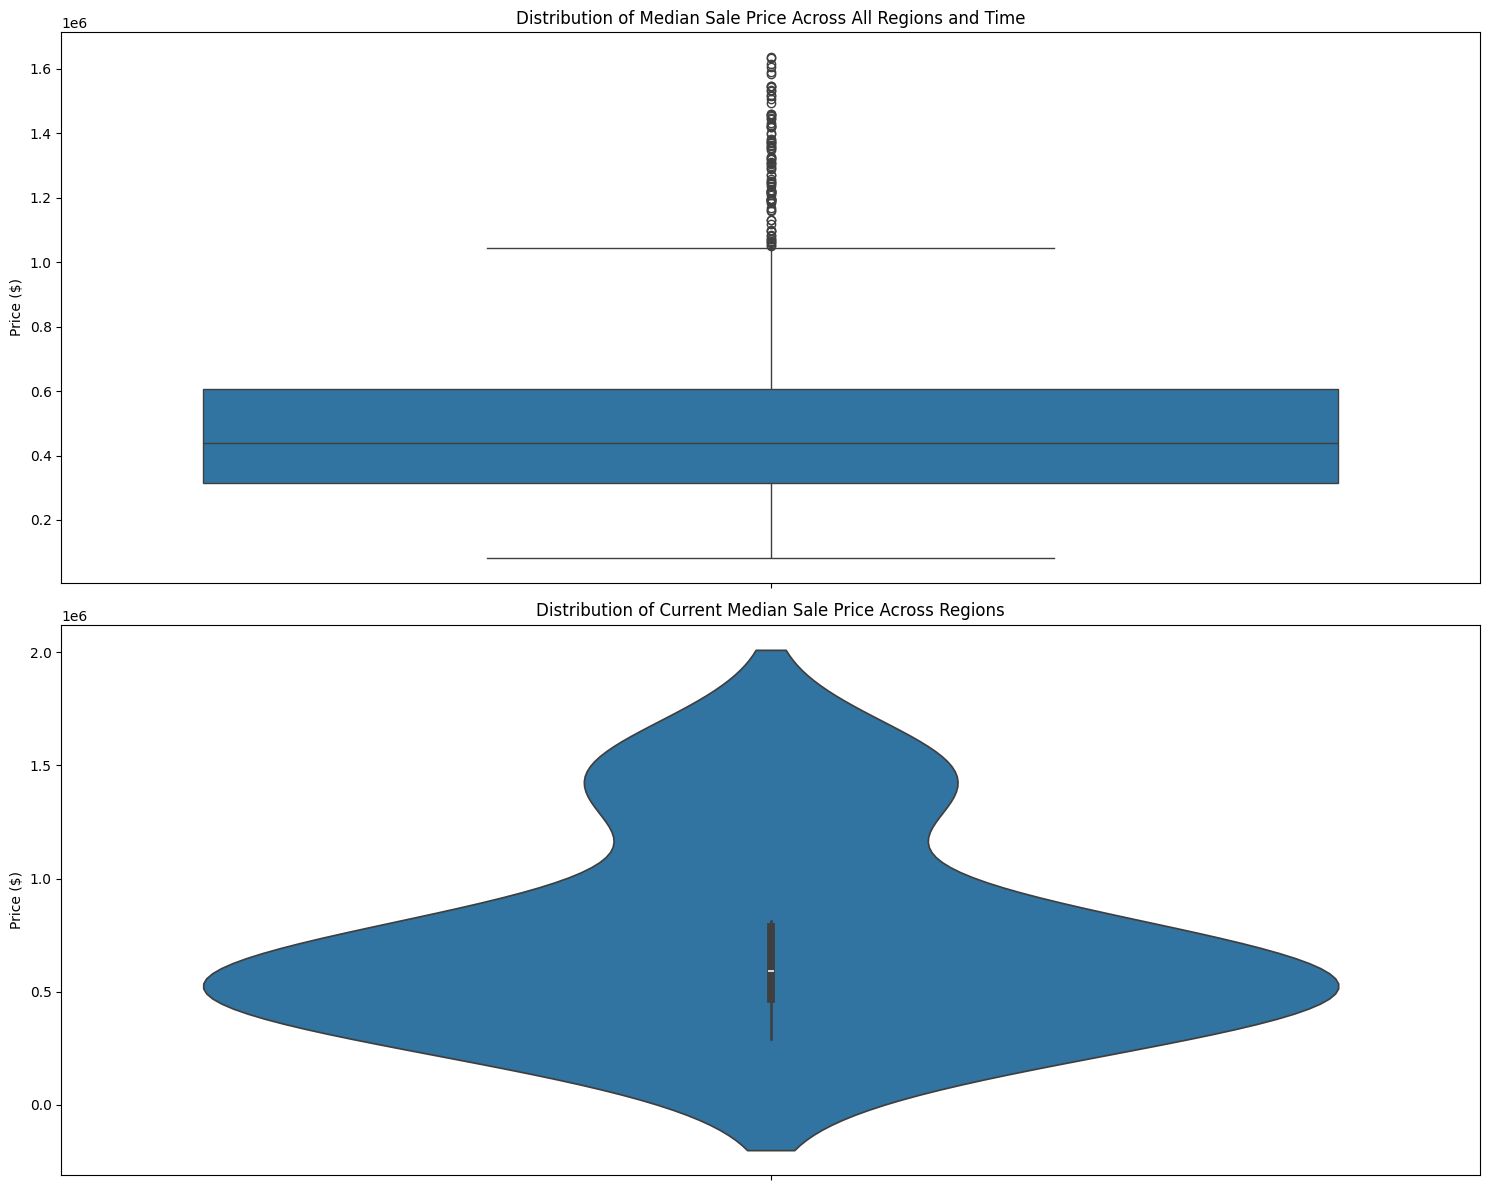

           RegionName           Mean         Median        Std Dev  \
8             Edwards  967794.265822  959941.084334  229727.069898   
12       Breckenridge  864934.295123  893477.580526  153318.163127   
13  Steamboat Springs  816341.329645  829453.943293  203304.749915   
7    Glenwood Springs  703497.033043  709310.754600  142432.319363   
3             Boulder  643970.211358  664734.518485   88233.014148   
9             Durango  526124.688860  513477.777434   95040.032276   
0              Denver  506856.385728  527369.498258   70805.125971   
2        Fort Collins  481209.425280  489247.231360   63112.413859   
4             Greeley  440155.225896  453305.751278   58930.096170   
1    Colorado Springs  397227.614437  419282.820992   60360.712255   
11           Montrose  377910.583900  389001.370081   67874.582075   
6      Grand Junction  332415.859578  343677.967238   55138.971984   
10         Canon City  283068.769883  294989.334621   48503.226914   
5              Puebl

In [29]:
# 1. Analyze price volatility
analyze_price_volatility(df, 'median_sale_price', date_range)
plt.show()

# 2. Analyze seasonality for a specific region
analyze_seasonality(df, 'Boulder', 'home_value_index', date_range)
plt.show()

# 3. Analyze correlations between price metrics
correlation_plot, correlation_data = price_correlation_analysis(df, date_range)
plt.show()
print(correlation_data)

# 4. Analyze price distributions
price_distribution_analysis(df, 'median_sale_price', date_range)
plt.show()

# 5. Get summary statistics
summary_stats = calculate_summary_statistics(df, 'home_value_index')
print(summary_stats)